### Assignment 2 Question 3

#### Loading liberary and dataset

In [1]:
library(caret)
library(class)
library(ggplot2)
library(ISLR2)
library(MASS)
library(reshape2)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




In [2]:
attach(Weekly)

#### (a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [3]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

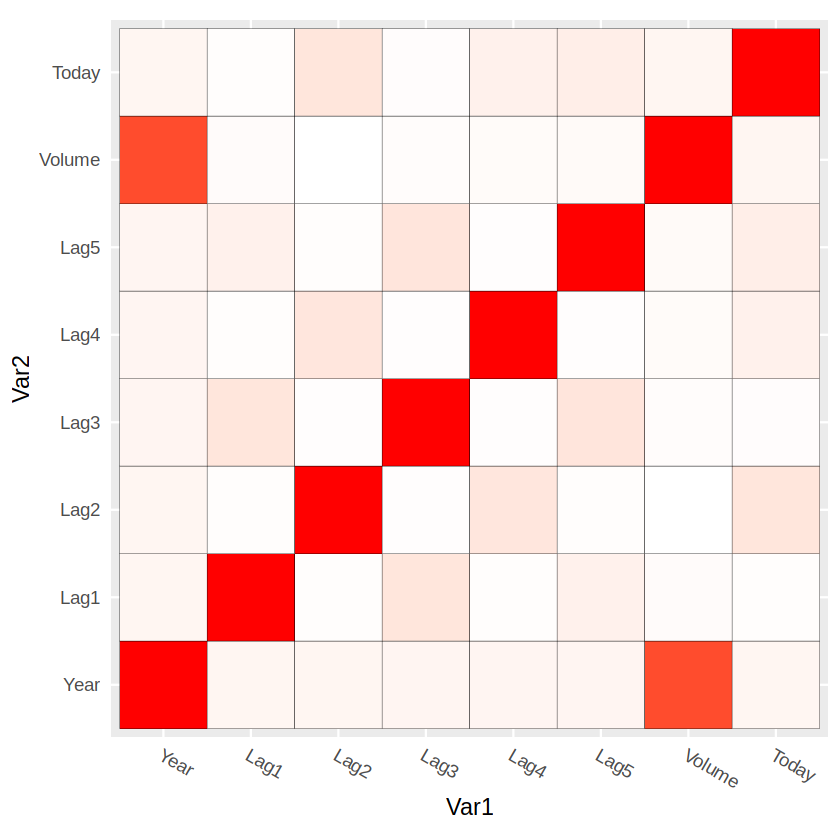

In [4]:
meltCor=melt(round(cor(Weekly[,-9]),10))
ggplot(data=meltCor,aes(x=Var1,y=Var2,fill=value))+
    geom_tile(color="black")+
    scale_fill_gradient(low="white",high="red")+
    coord_fixed()+
    theme_grey(base_size=14)+
    theme(legend.position="none",
        axis.ticks=element_blank(),
        axis.text.x=element_text(angle=330,hjust=0))

#### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [5]:
log.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Weekly,family=binomial)
summary(log.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [6]:
log.resp=predict(log.fit,type="response")
log.pred=rep("Down",length(log.resp))
log.pred[log.resp>0.5]="Up"

confusionMatrix(factor(log.pred),factor(Direction))

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   54  48
      Up    430 557
                                         
               Accuracy : 0.5611         
                 95% CI : (0.531, 0.5908)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.369          
                                         
                  Kappa : 0.035          
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.11157        
            Specificity : 0.92066        
         Pos Pred Value : 0.52941        
         Neg Pred Value : 0.56434        
             Prevalence : 0.44444        
         Detection Rate : 0.04959        
   Detection Prevalence : 0.09366        
      Balanced Accuracy : 0.51612        
                                         
       'Positive' Class : Down           
                                         

#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [7]:
train=(Year<2009)
test=Weekly[!train,]

test.direction=Direction[!train]

In [8]:
slog.glm=glm(Direction~Lag2,data=Weekly,family=binomial,subset=train)
slog.resp=predict(slog.glm,test,type="response")
slog.pred=rep("Down",length(slog.resp))
slog.pred[slog.resp>0.5]="Up"

confusionMatrix(factor(slog.pred),factor(test.direction))

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.20930        
            Specificity : 0.91803        
         Pos Pred Value : 0.64286        
         Neg Pred Value : 0.62222        
             Prevalence : 0.41346        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.13462        
      Balanced Accuracy : 0.56367        
                                         
       'Positive' Class : Down           
                                         

#### (e) Repeat (d) using LDA.

In [9]:
lda.lda=lda(Direction~Lag2,data=Weekly,subset=train)
lda.pred=predict(lda.lda,test)

confusionMatrix(factor(lda.pred$class),factor(test.direction))

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
                                         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.20930        
            Specificity : 0.91803        
         Pos Pred Value : 0.64286        
         Neg Pred Value : 0.62222        
             Prevalence : 0.41346        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.13462        
      Balanced Accuracy : 0.56367        
                                         
       'Positive' Class : Down           
                                         

#### (f) Repeat (d) using QDA.

In [10]:
qda.qda=qda(Direction~Lag2,data=Weekly,subset=train)
qda.pred=predict(qda.qda,test)

confusionMatrix(factor(qda.pred$class),factor(test.direction))

Warning message in confusionMatrix.default(factor(qda.pred$class), factor(test.direction)):
“Levels are not in the same order for reference and data. Refactoring data to match.”


Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.5865          
             Prevalence : 0.4135          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Down            
                              

#### (g) Repeat (d) using KNN with K = 1.

In [11]:
train.mat=as.matrix(Lag2[train])
test.mat=as.matrix(Lag2[!train])

train.direction=Direction[train]

In [12]:
knn.pred=knn(train.mat,test.mat,train.direction,k=1)
confusionMatrix(factor(knn.pred),factor(test.direction))

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   21 30
      Up     22 31
                                          
               Accuracy : 0.5             
                 95% CI : (0.4003, 0.5997)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.9700          
                                          
                  Kappa : -0.0033         
                                          
 Mcnemar's Test P-Value : 0.3317          
                                          
            Sensitivity : 0.4884          
            Specificity : 0.5082          
         Pos Pred Value : 0.4118          
         Neg Pred Value : 0.5849          
             Prevalence : 0.4135          
         Detection Rate : 0.2019          
   Detection Prevalence : 0.4904          
      Balanced Accuracy : 0.4983          
                                          
       'Positive' Class : Down            
                              